<br><br>
<font size = '6'><b>Dynamic Systems with Matlab</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
            Prof. Seungchul Lee<br>iSystems (http://isystems.unist.ac.kr/)<br>UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. Natural response to non-zero initial conditions

## 1.1. The First Order ODE
- MIT 2.087 Engineering Mathematics: Linear Algebra and ODEs, Fall 2014, by Gilbert Strang

<br>
$$ \frac{dx(t)}{dt} = kx(t), \qquad x(0)=x_0$$

$$ \rightarrow \; x(t) = x_0e^{\,kt}$$

In [2]:
%%html
<center><iframe  src="https://www.youtube.com/embed/4X0SGGrXDiI?start=399&end=459" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

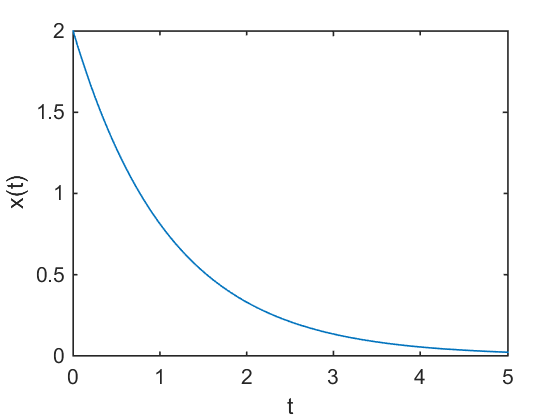

In [2]:
% plot an analytic solution

k = -0.9;
x0 = 2;

t = linspace(0,5,100);
x = x0*exp(k*t);

plot(t,x), xlabel('t'), ylabel('x(t)')

% but, all we did is just plotting (not computing)

To use `lsim` command, transform it to the state space representation


$$\dot{x} = Ax + Bu\\ y = Cx + Du$$

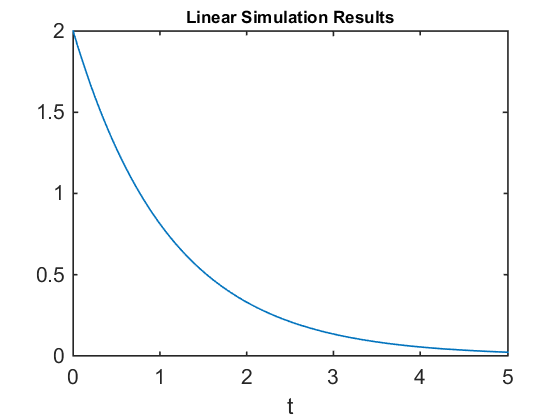

In [3]:
% numerically solve an ODE using lsim
A = k;
B = 0;
C = 1;
D = 0;
G = ss(A,B,C,D);

x0 = 2;
t = linspace(0,5,100);
u = zeros(size(t));
[y,tout] = lsim(G,u,t,x0);
plot(tout,y)
title('Linear Simulation Results','fontsize',8)
xlabel('t')

## 1.2. The Second Order ODE

- MIT 2.087 Engineering Mathematics: Linear Algebra and ODEs, Fall 2014, by Gilbert Strang

In [3]:
%%html
<center><iframe src="https://www.youtube.com/embed/xvTYUnqn2wY" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

Generic form 

$$ a\frac{d^2x(t)}{dt^2} + b\frac{dx(t)}{dt} + cx(t) = 0, \qquad \dot{x}(0)=v_0, x(0)=x_0$$

One of examples is the mass-spring-damper system

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_FreeVibration.png" alt="A Mass-Spring-Damper System" width=40%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. More specifically, we'll look at how system response to non-zero initial conditions. 

The equation of motion for the system is:

$$ \quad m \ddot{x} + c \dot{x} + kx = 0 $$

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$$

We'll use the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case is:

$$ \quad x(t) = e^{-\zeta\omega_nt}\left(a_1 e^{i \omega_d t} + a_2 e ^{-i \omega_d t}\right) $$

*or*

$$ \quad x(t) = e^{-\zeta\omega_nt}\left(b_1 \cos{\omega_d t} + b_2 \sin{\omega_d t}\right) $$

To use this equation, we need to solve for $a_1$ and $a_2$ or $b_1$ and $b_2$ using the initial conditions. Here, let's use the sin/cosine form. Solving the equation for generic intial velocity, $\dot{x} = v_0$, and a generic initial displacement, $x = x_0$, we find:

$$ \quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right) $$

** Experiment **

In [4]:
%%html
<center><iframe src="https://www.youtube.com/embed/ZqedDWEAUN4?start=80&end=114" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

## 1.3. State Space Representation


$$
\begin{align*}
\left[ {\begin{matrix}
   \dot{x}_1 \\
   \dot{x}_2 \\   
  \end{matrix} } \right]
  &=
\left[ {\begin{matrix}
   0 & 1 \\
   -\omega_n^2 & -2\zeta \omega_n \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] \\y & = 
\left[ {\begin{matrix}
   1 & 0    
\end{matrix} } \right]  
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right]  
\end{align*}
$$

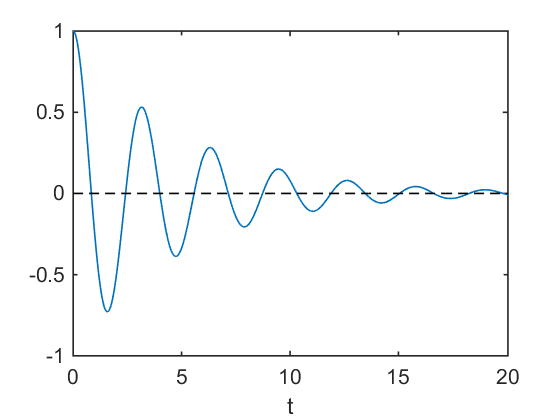

In [6]:
% method 1: use 'lsim'
wn = 2;
zeta = 0.1;

A = [0 1;-wn^2 -2*zeta*wn];
B = [0 0]';
C = [1 0];
D = 0;
G = ss(A,B,C,D);

x0 = [1 0]';

t = linspace(0,20,500);
u = zeros(size(t));
[y, tout] = lsim(G,u,t,x0);
plot(tout,y,tout,zeros(size(tout)),'k--'), xlabel('t')


## 1.4. Matrix Exponentials

<br>
$$ 
y(t) = e^{At}x\left( 0 \right) $$
<br>

- Lec 23 | MIT 18.06 Linear Algebra, Spring 2005 
- Matrix Exponentials | MIT 18.03SC Differential Equations, Fall 2011 
- Differential Equations and exp (At) | MIT 18.06SC Linear Algebra, Fall 2011 


In [5]:
%%html
<center><iframe src="https://www.youtube.com/embed/IZqwi0wJovM" 
width="420" height="315" frameborder="0" allowfullscreen></iframe></center>

In [6]:
%%html
<center><iframe src="https://www.youtube.com/embed/qbyeQum8qTE" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

In [7]:
%%html
<center><iframe src="https://www.youtube.com/embed/dZfdKXxhnTM" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

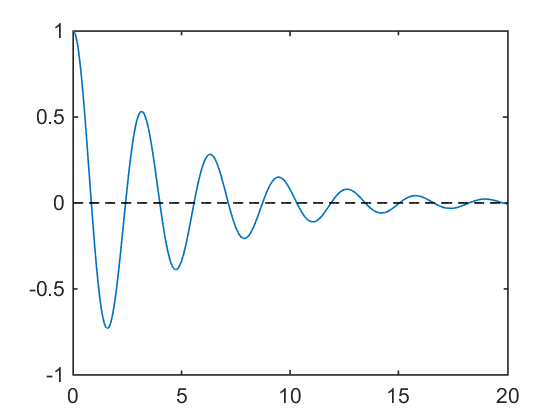

In [10]:
% method 2: use expm (matrix exponential)
x0 = [1 0]';
x = [];
t = 0:0.01:20;

for i = 1:length(t)
    x = [x expm(t(i)*A)*x0];
end

plot(t,x(1,:),t,zeros(size(t)),'k--')

## 1.5. Systems of Differential Equations (Matrix Differential Equation)
- Matrix Methods | MIT 18.03SC Differential Equations, Fall 2011 

In [8]:
%%html
<center><iframe src="https://www.youtube.com/embed/YUjdyKhWt6E" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

Given


$$ \dot{\vec{u}} = A\vec{u}, \qquad \vec{u}(0) = \vec{u}_0$$

- Eigenanalysis

$$ A\vec{x}_1 = \lambda_1 \vec{x}_1$$
$$ A\vec{x}_2 = \lambda_2 \vec{x}_2$$

- General solution: $$ \vec{u}(t) = c_1 \, e^{\lambda_1 t} \, \vec{x}_1 + c_2 \, e^{\lambda_2 t} \, \vec{x}_2 $$

where $$
\left[ {\begin{matrix}
   c_1 \\
   c_2 \\   
  \end{matrix} } \right] = 
\left[ {\begin{array}{cc}
   \vec{x}_1 \, \, \vec{x}_2 \\
  \end{array} } \right]^{-1}
\left[ {\begin{array}{cc}
   u_1(0) \\
   u_2(0) \\   
\end{array} } \right].
$$

<br>
- Systems of differential equations $\leftrightarrow$ Eigenanalysis (Gilbert Strang Lecture 21, video below)

- System stability $\leftrightarrow$ eigenvalues

In [9]:
%%html
<center><iframe src="https://www.youtube.com/embed/lXNXrLcoerU" 
width="420" height="315" frameborder="0" allowfullscreen></iframe></center>

### 1.5.1. Real eigenvalues

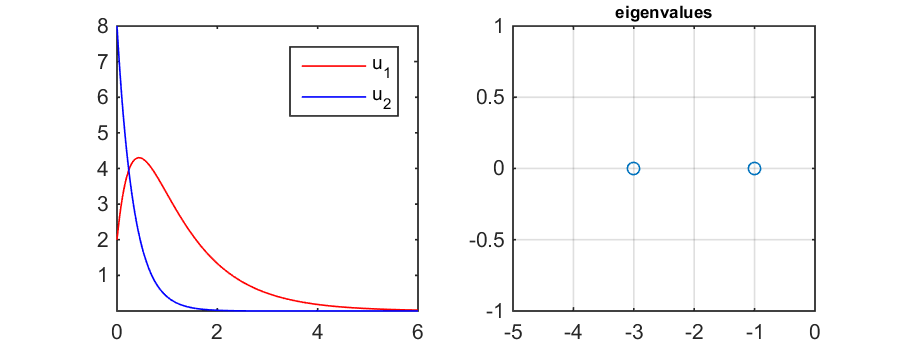

In [13]:
%plot -s 900,350
A = [-1  2
     0 -3];

%% eigen-analysis 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[V,D] = eig(A);
lambda = diag(D);

t = 0:0.01:6;    
U0 = [2 8]';        

C = inv(V)*U0;
u = C(1)*V(:,1)*exp(lambda(1)*t) + C(2)*V(:,2)*exp(lambda(2)*t);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% plot u1 and u2 as a function of time
subplot(1,2,1),  plot(t,u(1,:),'r',t,u(2,:),'b'), axis tight, legend('u_1','u_2')
subplot(1,2,2),  plot(real(lambda),imag(lambda),'o'), xlim([-5,0]), grid on, title('eigenvalues','fontsize',8)

__Phase portrait__
- https://en.wikipedia.org/wiki/Phase_portrait
- http://tutorial.math.lamar.edu/Classes/DE/PhasePlane.aspx
- Lec 27 | MIT 18.03 Differential Equations, Spring 2006 

In [10]:
%%html
<center><iframe src="https://www.youtube.com/embed/e3FfmXtkppM" 
width="420" height="315" frameborder="0" allowfullscreen></iframe></center>

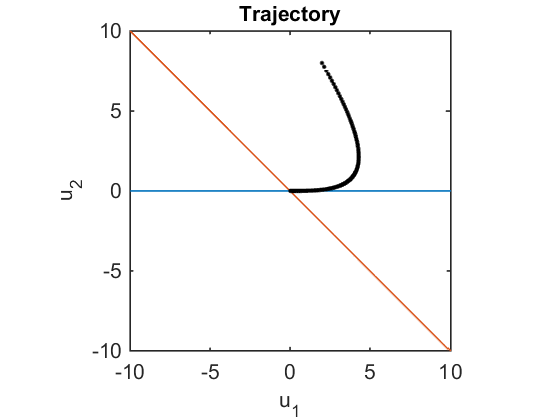

In [15]:
%plot -s 560,420
% plot eigenvectors (X1 and X2)
k = -20:0.1:20;
y1 = V(:,1)*k;
y2 = V(:,2)*k;

plot(y1(1,:),y1(2,:));   hold on
plot(y2(1,:),y2(2,:));
xlabel('u_1','fontsize',10)
ylabel('u_2','fontsize',10)
title('Trajectory','fontsize',10)
axis equal
axis([-10 10 -10 10])

% plot a trajectory of u1 and u2 
for i = 1:length(t)
    plot(u(1,i),u(2,i),'k.'); 
end
hold off

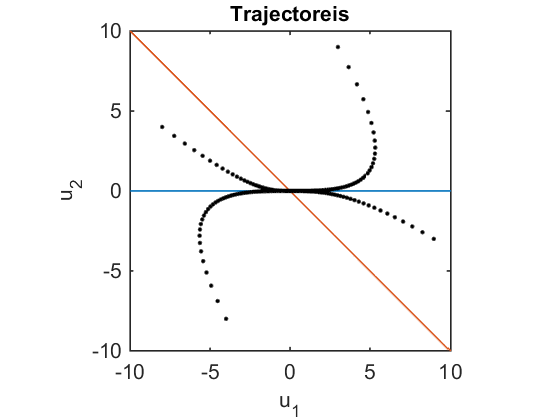

In [16]:
% with multiple initial conditions

A = [-1  2;0 -3];
%A = [-2  0;0 -4];
%A = [-2  0;1 -4];     

%%
[V,D] = eig(A);
lambda = diag(D);

t = 0:0.05:5;    
U0 = [3  9 -8  -4;
      9 -3  4 -8 ];        

% plot eigenvectors (X1 and X2)
k = -20:0.1:20;
y1 = V(:,1)*k;
y2 = V(:,2)*k;

plot(y1(1,:),y1(2,:));   hold on
plot(y2(1,:),y2(2,:));
    
for m = 1:length(U0)
    C = inv(V)*U0(:,m);
    u = C(1)*V(:,1)*exp(lambda(1)*t) + C(2)*V(:,2)*exp(lambda(2)*t);

    % plot a trajectory of u1 and u2 
    for i = 1:length(t)
        plot(u(1,i),u(2,i),'k.'); 
    end
end

hold off
xlabel('u_1','fontsize',10)
ylabel('u_2','fontsize',10)
title('Trajectoreis','fontsize',10)
axis equal
axis([-10 10 -10 10])

### 1.5.2. Complex eigenvalues (starting oscilation)

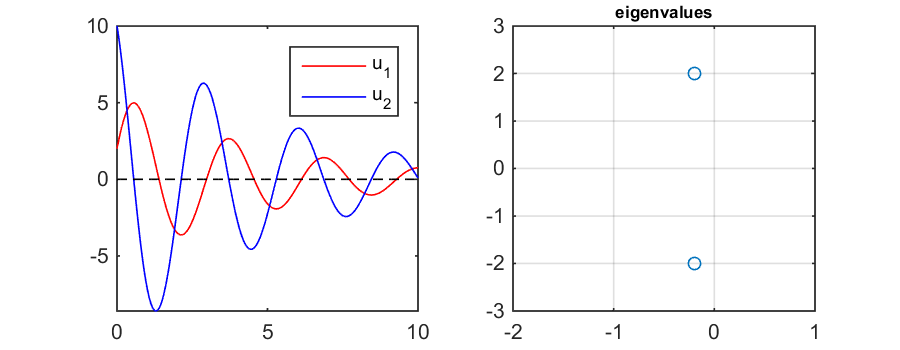

lambda =

  -0.2000 + 1.9900i
  -0.2000 - 1.9900i

In [17]:
%plot -s 900,350

%A = [0 1;-1 0];    
wn = 2; zeta = 0.1; A = [0 1;-wn^2 -2*zeta*wn];

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[V,D] = eig(A);
lambda = diag(D)

t = 0:0.01:10;    
U0 = [2 10]';        
C = inv(V)*U0;

u = C(1)*V(:,1)*exp(lambda(1)*t) + C(2)*V(:,2)*exp(lambda(2)*t);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% plot u1 and u2 as a function of time
subplot(1,2,1),  plot(t,u(1,:),'r',t,u(2,:),'b',t,zeros(size(t)),'k--'), axis tight, legend('u_1','u_2')
subplot(1,2,2),  plot(real(lambda),imag(lambda),'o'), ylim([-3,3]), grid on, title('eigenvalues','fontsize',8)

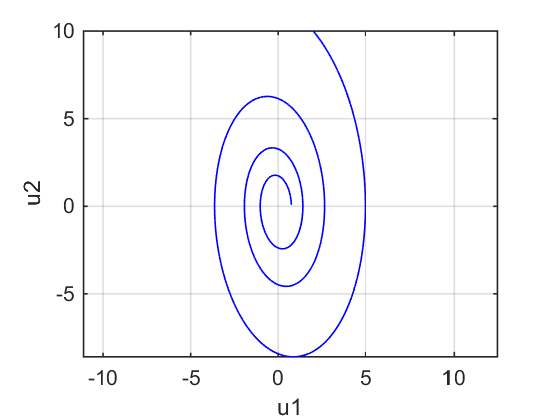

In [18]:
%plot -s 560,420

% Phase portrait
plot(u(1,:),u(2,:),'b')
axis equal, grid on
xlabel('u1')
ylabel('u2')

# 2. Response to General Inputs

## 2.1. Step response
Start with a _**step response**_ example

$$ \dot{x} + 5x = 1 \quad \text{for} \quad t \geq 0, \qquad x(0) = 0$$

or

$$ \dot{x} + 5x = u(t), \qquad x(0) = 0 $$

The solution is given:

$$ x(t) = \frac{1}{5}\left( 1-e^{-5t} \right)$$

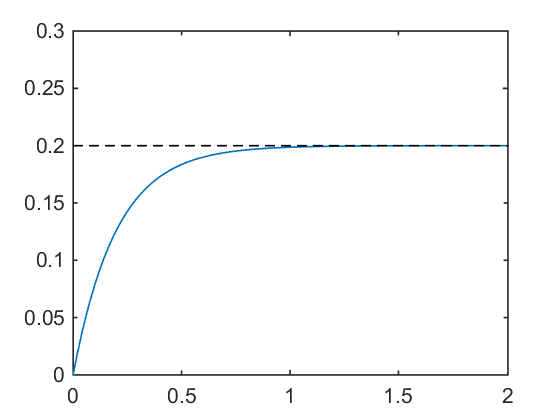

In [19]:
t = linspace(0,2,100);
x = 1/5*(1-exp(-5*t));
plot(t,x,t,0.2*ones(size(t)),'k--'), ylim([0,0.3])

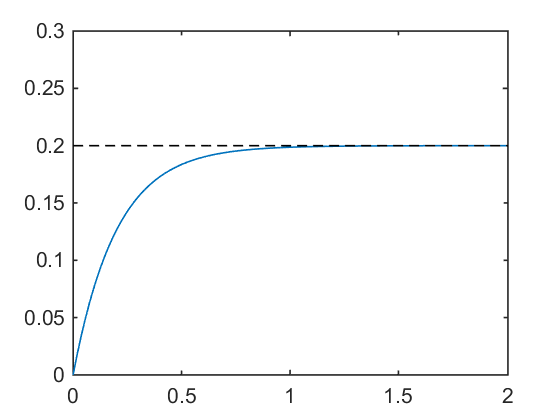

In [20]:
% method 1
% define a system first
num = 1;
den = [1 5];
G = tf(num,den);

[y,tout] = step(G,2);
plot(tout,y,tout,0.2*ones(size(tout)),'k--'), ylim([0,0.3])

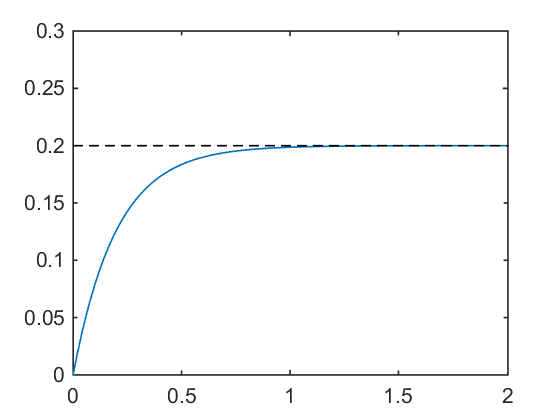

In [21]:
% method 2
% define a system first
A = -5;
B = 1;
C = 1;
D = 0;
G = ss(A,B,C,D);

t = linspace(0,2,100);
u = ones(size(t));
x0 = 0;

[y,tout] = lsim(G,u,t,x0);
plot(tout,y,tout,0.2*ones(size(tout)),'k--'), ylim([0,0.3])

## 2.2. Impulse response

Now think about the _**impulse response**_

$$ \dot{x} + 5x = \delta(t), \qquad x(0) = 0 $$

The solution is given: (why?)

$$ h(t) = e^{-5t},\quad t\geq0$$ 

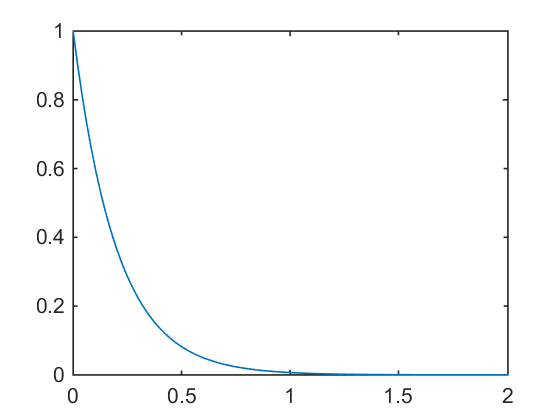

In [22]:
t = linspace(0,2,100);
h = exp(-5*t);
plot(t,h), ylim([0,1])

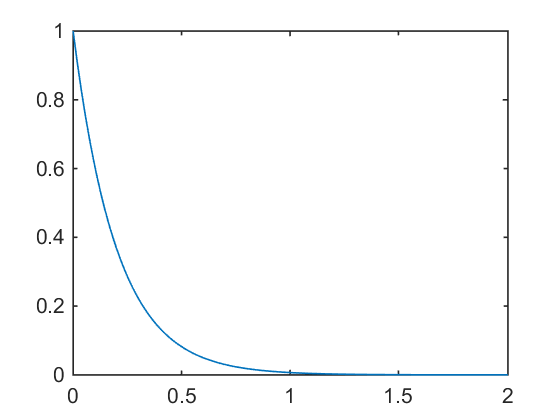

In [23]:
% method 1
% define a system first
num = 1;
den = [1 5];
G = tf(num,den);

[h,tout] = impulse(G,2);
plot(tout,h), ylim([0,1])

Impulse input can be equivalently changed to zero input with non-zero initial condition (by the impulse and momentum theory)


$$ \int_{0^-}^{0^+}\delta(t) dt = u(0^+)-u(0^-)=1$$

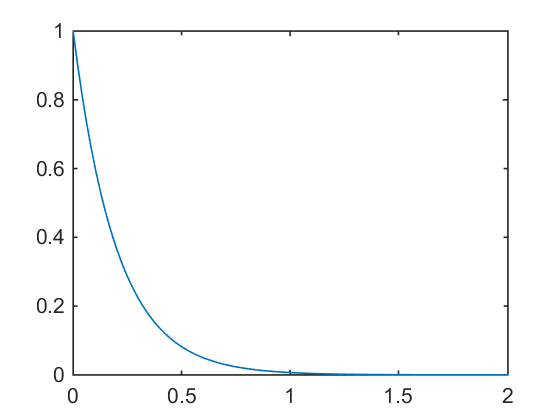

In [24]:
% method 2
% define a system first
A = -5;
B = 1;
C = 1;
D = 0;
G = ss(A,B,C,D);

t = linspace(0,2,100);

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
u = zeros(size(t));
x0 = 1;
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

[h,tout] = lsim(G,u,t,x0);
plot(tout,h), ylim([0,1])

## 2.3. Response to a general input

Response to a _**general input**_

$$ \dot{x} + 5x = f(t), \qquad x(0) = 0 $$

The solution is given:

$$ x(t) = h(t)*f(t),\quad t\geq0$$

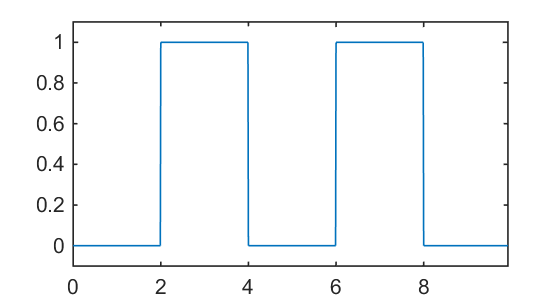

In [25]:
%plot -s 560,300
% generate a general input

[f,t] = gensig('square',4,10,0.01);
plot(t,f), axis([0,9.9,-0.1,1.1])

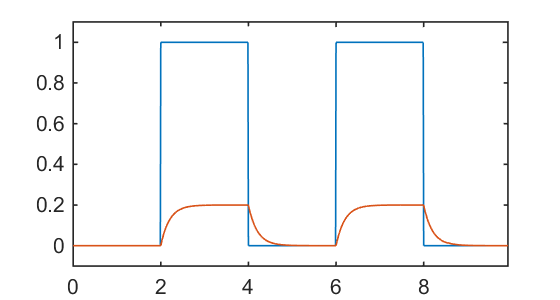

In [26]:
%plot -s 560,300
% use lsim

A = -5;
B = 1;
C = 1;
D = 0;
G = ss(A,B,C,D);

x0 = 0;
[f,t] = gensig('square',4,10,0.01);
[y,tout] = lsim(G,f,t,x0);

plot(t,f), hold on
plot(tout,y), hold off, axis([0,9.9,-0.1,1.1])

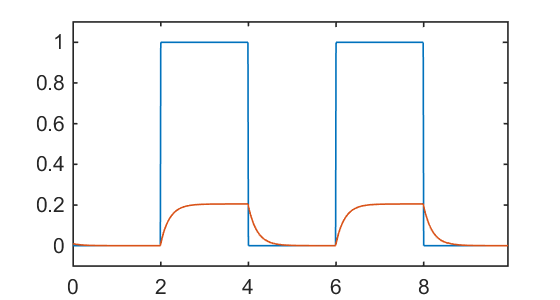

In [27]:
%plot -s 560,300
% convolution

[f,t] = gensig('square',4,10,0.01);
h = exp(-5*t);
y = cconv(f,h,length(t))/100;

plot(t,f), hold on
plot(t,y), hold off, axis([0,9.9,-0.1,1.1])

## 2.4. Reponse to a sinusoidal input

- only focus on _steady-state_ solution
- transient solution is not our interest any more

Assume:

$$ y(t)=\sin(\omega t)$$

Then, the solution $x(t)$ should have the form:

$$ x(t)=a\sin(\omega t)+b\cos(\omega t) = A \sin(\omega t + \phi)$$

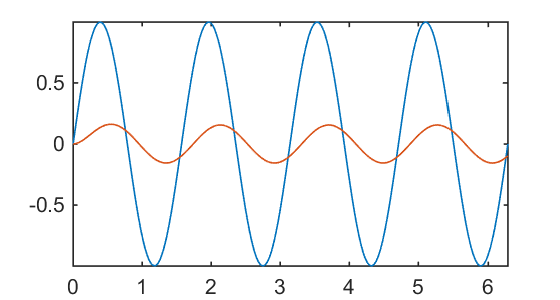

In [28]:
%plot -s 560,300
% use lsim

A = -5;
B = 1;
C = 1;
D = 0;
G = ss(A,B,C,D);

x0 = 0;
w = 4;

t = linspace(0,2*pi,200);
f = sin(w*t);
[y,tout] = lsim(G,f,t,x0);

plot(t,f), hold on
plot(tout,y), hold off, axis tight 

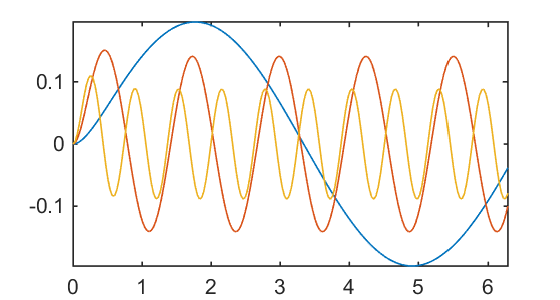

In [29]:
%plot -s 560,300
% use lsim

A = -5;
B = 1;
C = 1;
D = 0;
G = ss(A,B,C,D);

x0 = 0;

t = linspace(0,2*pi,200);

W = [1,5,10];
for w = W
    f = sin(w*t);
    [y,tout] = lsim(G,f,t,x0);

    plot(tout,y), hold on
end
hold off, axis tight 

# 3. Frequency response (frequency sweep)

Given input $ e^{j\omega t} $

$$ \dot{z} + 5z = e^{j\omega t} $$

If $ z = Ae^{j(\omega t + \phi)} $

$$ 
\begin{align*}
j\omega A e^{j(\omega t + \phi)} + 5Ae^{j(\omega t + \phi)} &= e^{j\omega t}\\
\left( j\omega + 5  \right)Ae^{j\phi} &= 1\\
\end{align*}
$$

Therefore,

$$
\begin{align*}
A &= \frac{1}{\mid {j\omega + 5}\mid} \\
\phi &= -\angle{(j\omega + 5)}
\end{align*}
$$


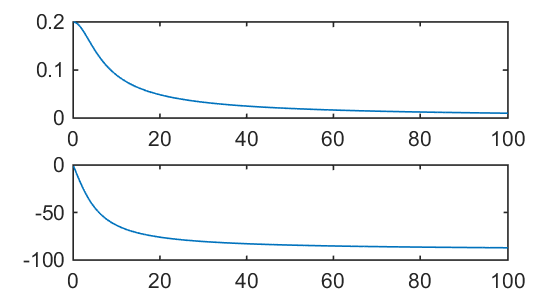

In [30]:
w = 0.1:0.1:100;
A = 1./abs(1j*w+5);
Ph = -angle(1j*w+5)*180/pi;

subplot(2,1,1), plot(w,A)
subplot(2,1,2), plot(w,Ph)

% later, we will see that this is kind of a bode plot

<br>

$$\begin{align*} 
\quad \ddot{z} + 2\zeta\omega_n\dot{z} + \omega_n^2 z &= \omega_n^2 \;f(t)\\
\quad \ddot{z} + 2\zeta\omega_n\dot{z} + \omega_n^2 z &= \omega_n^2 \;A_0e^{j \Omega t}
\end{align*}$$

- We know that $z$ is in the form of 

$$z = A e^{j(\Omega t + \phi)}$$

- Then


$$ 
\begin{align*}\left( -\Omega^2 + j 2\zeta \omega_n \Omega + \omega_n^2 \right)Ae^{j\phi} e^{j\Omega t} &= \omega_n^2 A_0 e^{j \Omega t} \\
Ae^{j\phi} &= \frac{ \omega_n^2 A_0}{-\Omega^2 + j 2\zeta \omega_n \Omega + \omega_n^2} = A_0\frac{1}{1-\left(\frac{\Omega}{\omega_n}\right)^2 + j 2\zeta \left(\frac{\Omega}{\omega_n}\right)}
\end{align*}$$

<br>
$$ 
\begin{align*}\frac{A}{A_0} &= \frac{1}{ \sqrt{ \left(1-\left(\frac{\Omega}{\omega_n}\right)^2 \right)^2 +  4\zeta^2 \left(\frac{\Omega}{\omega_n}\right)^2 }} = \frac{1}{ \sqrt{ \left(1-\gamma^2 \right)^2 +  4\zeta^2 \gamma^2 }}, \quad  \left(\gamma = \frac{\Omega}{\omega_n} \right)\\
\phi &= -\tan^{-1} \left( \frac{2\zeta \frac{\Omega}{\omega_n}}{1-\left(\frac{\Omega}{\omega_n}\right)^2} \right) =-\tan^{-1} \left( \frac{2\zeta \gamma}{1-\gamma^2} \right)
\end{align*}$$


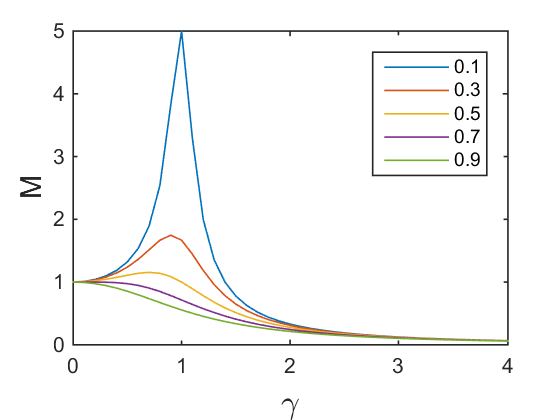

In [31]:
%plot -s 560,420
r = 0:0.1:4;

zeta = 0.1:0.2:1;
M = [];
for i = 1:length(zeta)
    M(i,:) = 1./sqrt((1-r.^2).^2 + (2*zeta(i)*r).^2); % ignore a constant of F0/k
end

plot(r,M)
xlabel('\gamma','fontsize',16)
ylabel('M','fontsize',14)
legend('0.1','0.3','0.5','0.7','0.9')

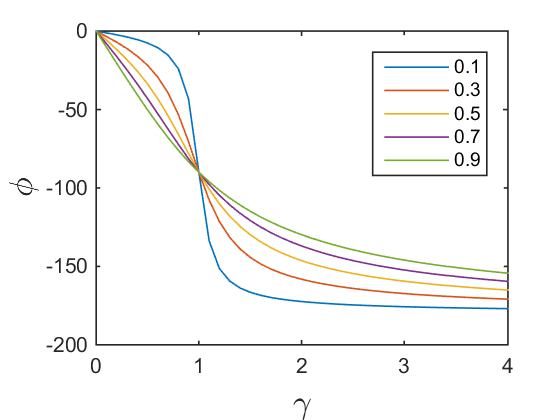

In [32]:
%plot -s 560,420
phi = [];
for i = 1:length(zeta)
    phi(i,:) = -atan2((2*zeta(i).*r),(1-r.^2));
end

plot(r,phi*180/pi)
xlabel('\gamma','fontsize',16)
ylabel('\phi','fontsize',16)
legend('0.1','0.3','0.5','0.7','0.9')

## 3.1. Fourier Series of square wave 

- decompose a genernal signal (ex. square wave) to a linear combinarion of sinusoidal signals

$$ x(t) = \frac{1}{2} - \frac{2}{\pi}\sum_{n =1,2,3,}\frac{1}{n}\sin\left( \frac{n\pi t}{L}\right) $$

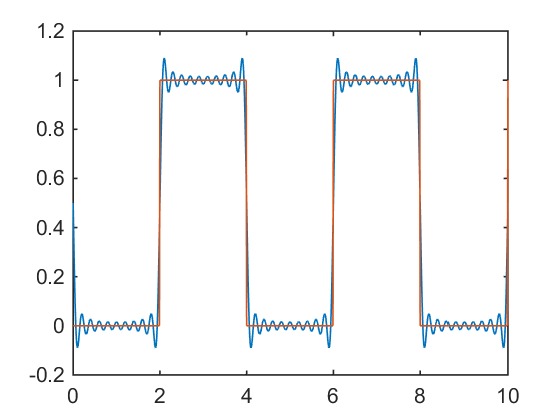

In [33]:
[f,t] = gensig('square',4,10,0.01);
L = 2;
x = 1/2*ones(size(t));

for n = 1:2:20
    x = x - 2/pi*1/n*sin(n*pi/L*t);    
end

plot(t,x,t,f)

The output response of LTI

Linearity: input $ \sum_k c_k x_k(t)$ produces $ \sum_k c_k y_k(t)$

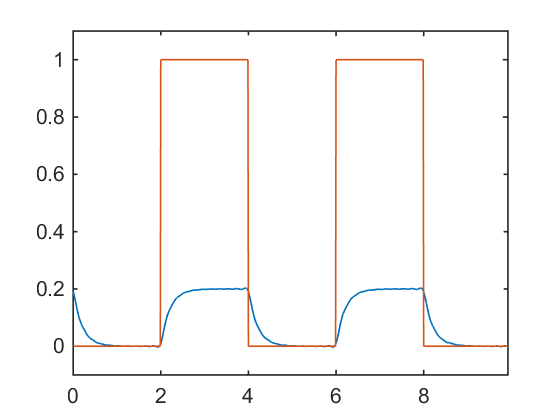

In [34]:
[f,t] = gensig('square',4,10,0.01);
L = 2;
x = 1/2*ones(size(t));
x2 = 0.2*x;

for n = 1:2:20
    w = n*pi/L;
    A = 1./abs(1j*w+5);
    Ph = -phase(1j*w+5); 
    x2 = x2 - 2/pi*1/n*A*sin(w*t + Ph);    
end

plot(t,x2,t,f), axis([0,9.9,-0.1,1.1])

In [35]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>